# Scientific Python
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University
* 2024

Numpy and Matplotlib.

These are two of the most fundamental parts of the scientific python "ecosystem". Most everything else is built on top of them.


### Core numeric libraries

* **NumPy**: numerical computing with powerful numerical arrays objects, and routines to manipulate them. https://numpy.org/
* **Matplotlib** : 2-D visualization, “publication-ready” plots https://matplotlib.org/

### High-level numerical routines
* **SciPy** : Optimization, regression, interpolation, etc https://scipy.org/

### Domain-specific packages
* **pandas**, **statsmodels**, **seaborn** for [statistics](https://lectures.scientific-python.org/packages/statistics/index.html#statistics)
* **sympy** for [symbolic computing](https://lectures.scientific-python.org/packages/sympy.html#sympy)
* **scikit-image** for [image processing](https://lectures.scientific-python.org/packages/scikit-image/index.html#scikit-image)
* **scikit-learn** for [machine learning](https://lectures.scientific-python.org/packages/scikit-learn/index.html#scikit-learn-chapter)

In [ ]:
import numpy as np

What did we just do? We _imported_ a package. This brings new variables (mostly functions) into our interpreter. We access them as follows.

In [ ]:
# find out what version we have
np.__version__

### NDArrays

The core class is the numpy ndarray (n-dimensional array).

In [ ]:
# create an array from a list
a = np.array([9,0,2,1,0])
print(a)

In [ ]:
# find out the datatype
a.dtype

In [ ]:
# find out the shape
a.shape

In [ ]:
# another array with a different datatype and shape
b = np.array([[5,3,1,9],[9,2,3,0]], dtype=np.float64)

In [ ]:
# check dtype and shape
b.dtype, b.shape

__Important Concept__: The fastest varying dimension is the last dimension! The outer level of the hierarchy is the first dimension. (This is called "c-style" indexing)

## More array creation ##

There are lots of ways to create arrays.

In [ ]:
# create some uniform arrays
c = np.zeros((9,9))
d = np.ones((3,6,3), dtype=np.complex128)
e = np.full((3,3), np.pi)
e = np.ones_like(c)
f = np.zeros_like(d)

In [ ]:
# create some ranges
np.arange(10)

In [ ]:
# arange is left inclusive, right exclusive
np.arange(2,4,0.25)

In [ ]:
# linearly spaced
np.linspace(2,4,20)

In [ ]:
# log spaced
np.logspace(1,2,11, base=10)

In [ ]:
# two dimensional grids
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

### Indexing

Basic indexing is similar to lists

In [ ]:
# get some individual elements of xx
print(xx)
xx[0,0], xx[-1,-1], xx[3,-5]

In [ ]:
# get some whole rows and columns
xx[0].shape, xx[:,-1].shape

In [ ]:
# get some ranges
xx[3:10,30:40].shape

There are many advanced ways to index arrays. You can read about them in the manual. Here is one example.

In [ ]:
# use a boolean array as an index
idx = xx<0
yy[idx].shape

In [ ]:
# the array got flattened
xx.ravel().shape

### Array Operations

There are a huge number of operations available on arrays. All the familiar arithemtic operators are applied on an element-by-element basis.


In [ ]:
f = np.sin(xx) * np.cos(0.5*yy)

At this point you might be getting curious what these arrays "look" like. So we need to introduce some visualization.

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
plt.pcolormesh(f)

### Manipulating array dimensions

In [ ]:
# transpose
plt.pcolormesh(f.T)

In [ ]:
# reshape an array (wrong size)
g = np.reshape(f, (8,9))

In [ ]:
# reshape an array (right size) and mess it up
print(f.size)
g = np.reshape(f, (200,25))
plt.pcolormesh(g)

### Broadcasting

Broadcasting is an efficient way to multiply arrays of different sizes


<img src="http://scipy-lectures.github.io/_images/numpy_broadcasting.png" width=800>

In [34]:
# multiply f by x
print(f.shape, x.shape)
g = f * x
print(g.shape)

(50, 100) (100,)
(50, 100)


In [35]:
# multiply f by y
print(f.shape, y.shape)
h = f * y
print(h.shape)

(50, 100) (50,)


ValueError: operands could not be broadcast together with shapes (50,100) (50,) 

In [36]:
# use newaxis special syntax
h = f * y[:,np.newaxis]
print(h.shape)

(50, 100)


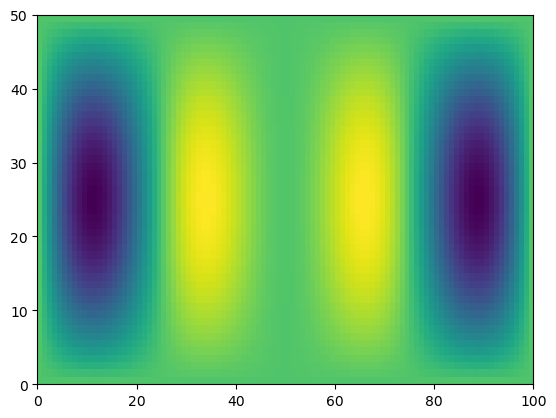

In [37]:
plt.pcolormesh(g)

### Reduction Operations

In [ ]:
# sum
g.sum()

In [ ]:
# mean
g.mean()

In [ ]:
# std
g.std()

In [ ]:
# apply on just one axis
g_ymean = g.mean(axis=0)
g_xmean = g.mean(axis=1)

In [ ]:
plt.plot(x, g_ymean)

In [ ]:
plt.plot(g_xmean, y)

### Reference

* https://lectures.scientific-python.org
* https://github.com/rabernat/python_teaching
* https://wy2136.github.io/python.html